# 13_MiniAlexNet-Supervised-SBATCH

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.load_MNIST import load_MNIST

from src.training_results import CNNSupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [4]:
train_dataloader, val_dataloader, test_dataloader = load_MNIST(
    root='./data', subset_frac=0.05, 
    batch_size=32, validation_ratio=6, seed=42
)

In [5]:
total_size = 320

# Quick runs - MNIST

```bash
$ sbatch sbatch_scripts/13_activity-prune_CNN_fast_MNIST.sh 
Submitted batch job 57014938 # GPU run
$ sbatch sbatch_scripts/13_random-prune_CNN_fast_MNIST.sh 
Submitted batch job 56961678
$ sbatch sbatch_scripts/13_no-prune_CNN_fast.sh 
Submitted batch job 56942275
```

## No Prune

In [4]:
no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_fast/sbatch-56942275_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

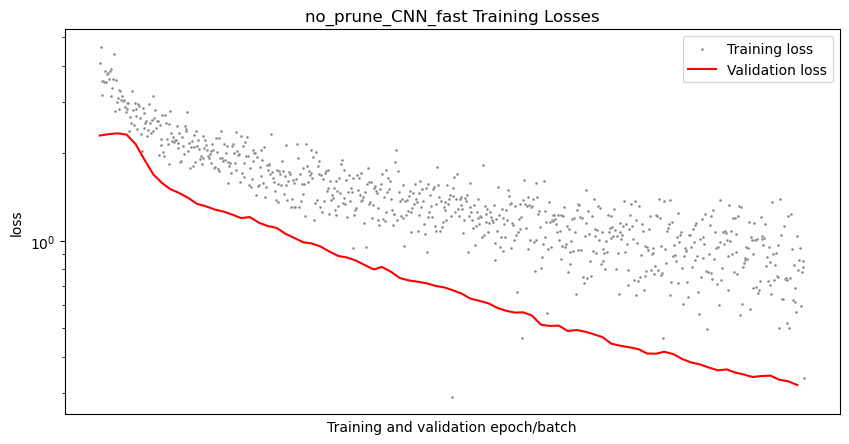

In [5]:
no_prune_results.plot_training_losses()

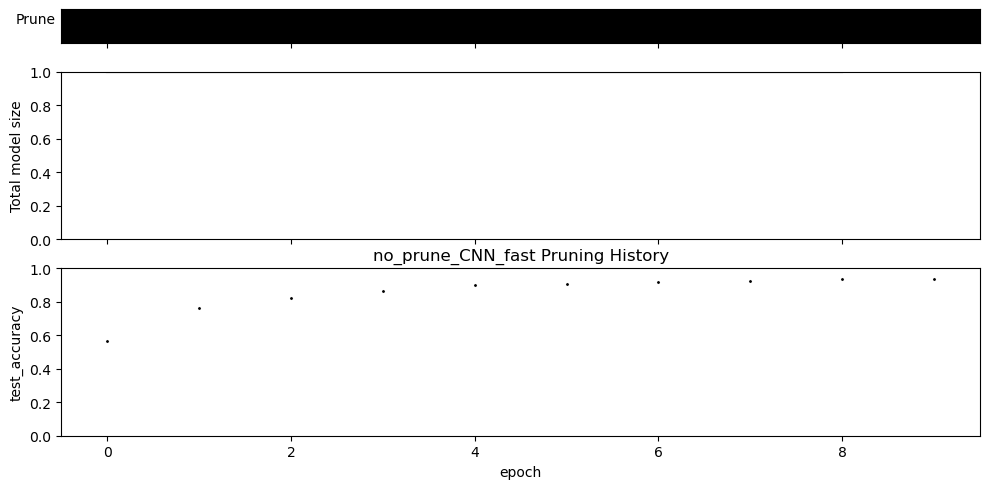

In [16]:
fig, ax = no_prune_results.plot_pruning(norm_size=total_size)

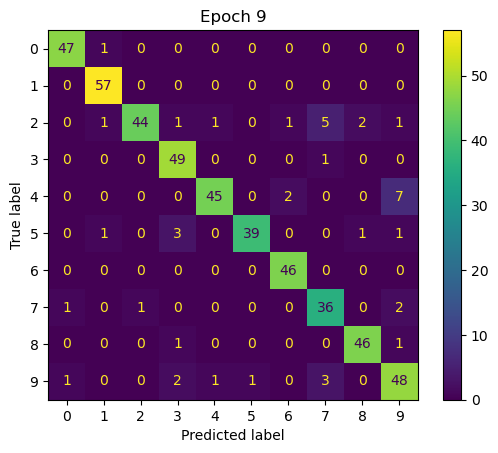

In [10]:
no_prune_results.set_trained_model(9)
no_prune_results.plot_confusion_matrix(test_dataloader)

## Random

In [29]:
random_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/random_prune_CNN_fast/sbatch-56961678_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

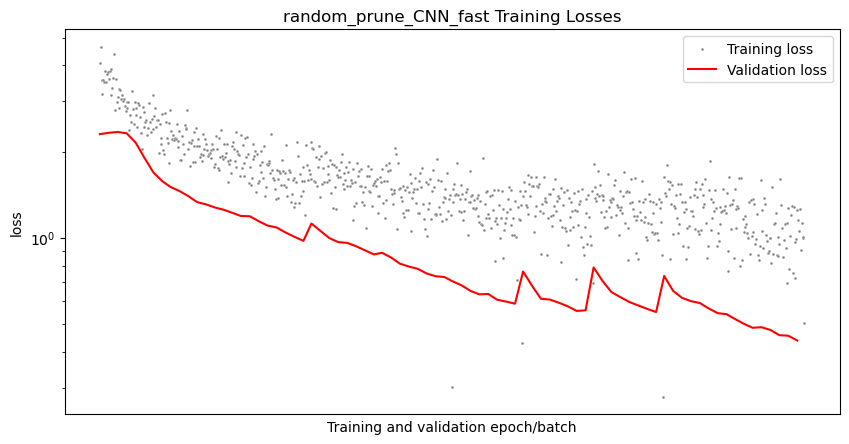

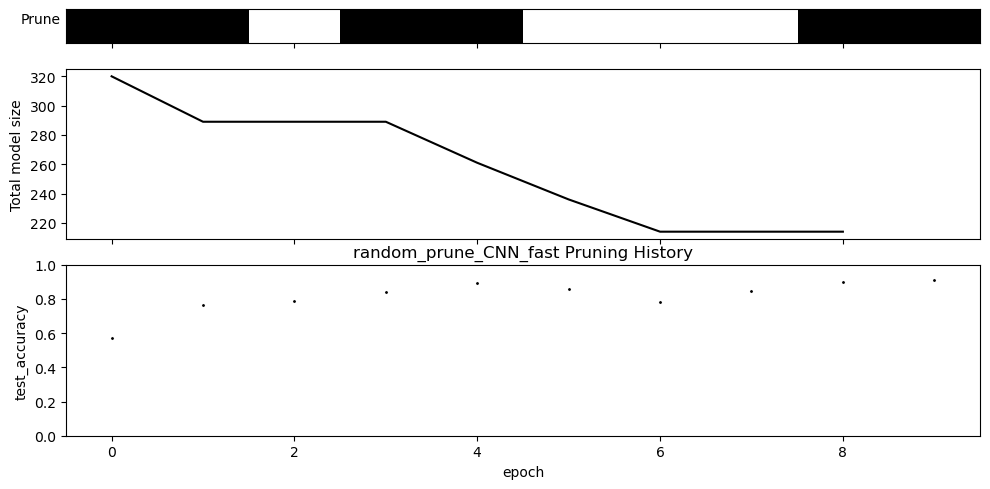

In [30]:
random_prune_results.plot_training_losses()
random_prune_results.plot_pruning()

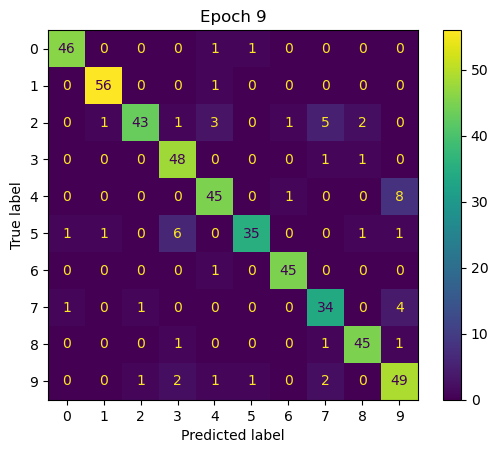

In [32]:
random_prune_results.set_trained_model(9)
random_prune_results.plot_confusion_matrix(test_dataloader)

## Activity prune

In [13]:
# activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_fast/sbatch-56961381_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")
activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_fast/sbatch-c_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

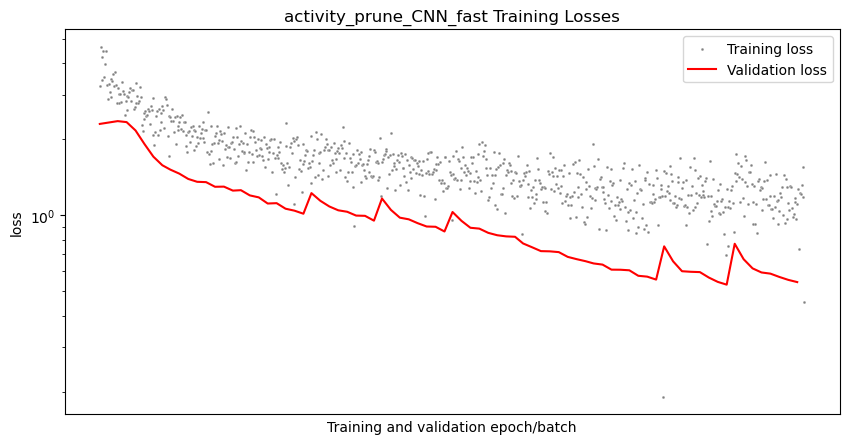

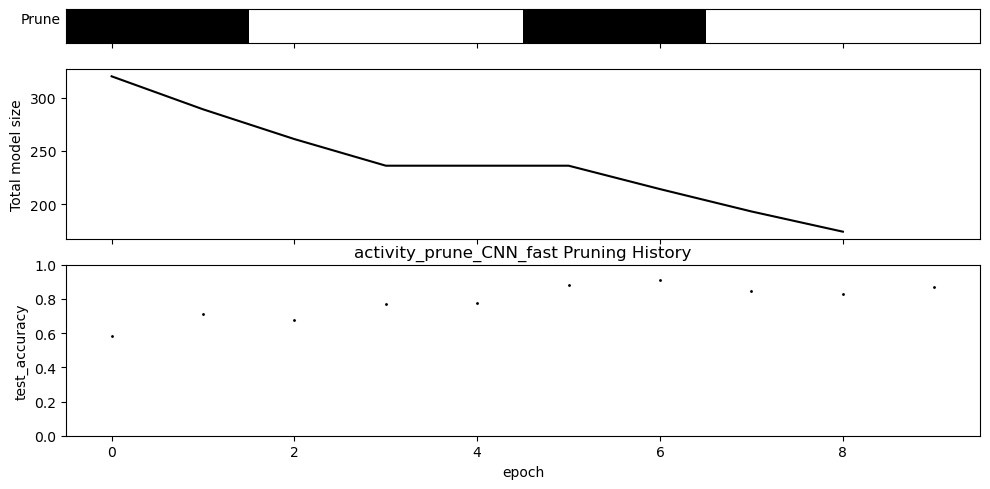

In [14]:
fig, ax = activity_prune_results.plot_training_losses()
fig, ax = activity_prune_results.plot_pruning()

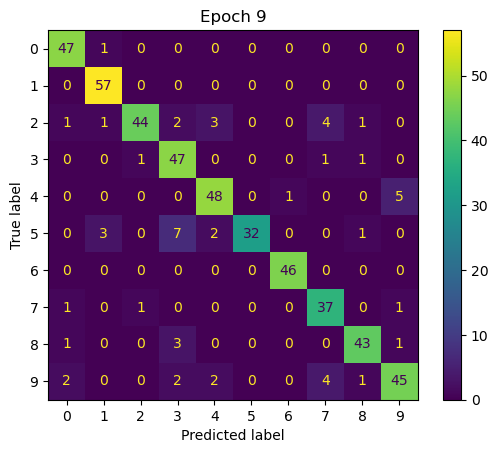

In [15]:
activity_prune_results.set_trained_model(9)
activity_prune_results.plot_confusion_matrix(test_dataloader)

# Full results

```bash
$ sbatch sbatch_scripts/13_activity-prune_CNN_full_MNIST.sh 
Submitted batch job 57016329
$ sbatch sbatch_scripts/13_random-prune_CNN_full_MNIST.sh 
Submitted batch job 57016337
$ sbatch sbatch_scripts/13_no-prune_CNN_full.sh 
Submitted batch job 57016361
```

In [26]:
full_no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_full/sbatch-57016361_ds-MNIST_ic-1_bs-32_sf-0.1_vr-6_nti-250_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")
full_random_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/random_prune_CNN_full/sbatch-57016337_ds-MNIST_ic-1_bs-32_sf-0.1_vr-6_nti-250_lmd-10_pmt-Random_g-0.1_lr-0.001_s-4")
full_activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/activity_prune_CNN_full/sbatch-57016329_ds-MNIST_ic-1_bs-32_sf-0.1_vr-6_nti-250_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

## No Pruning

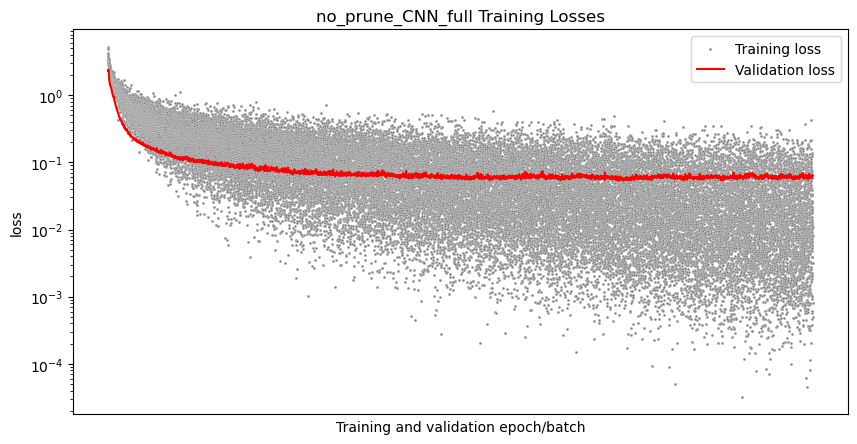

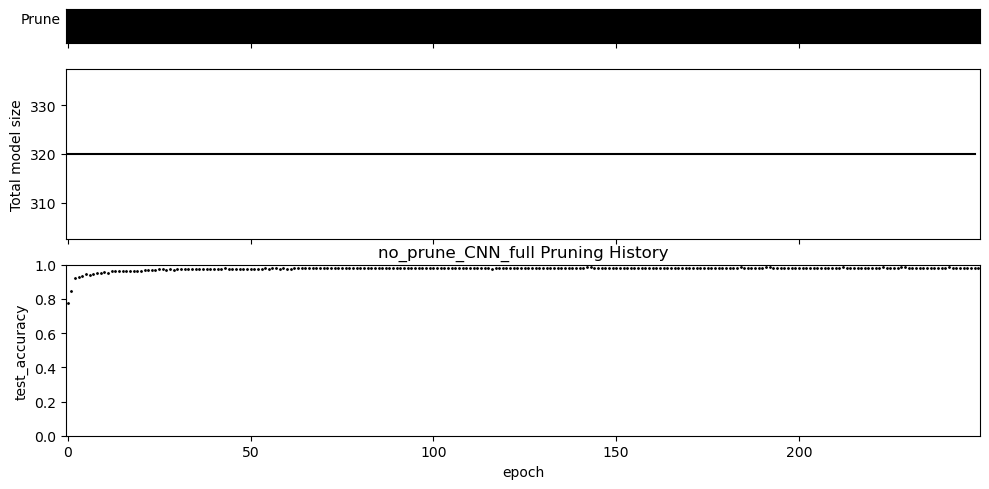

In [27]:
fig, ax = full_no_prune_results.plot_training_losses()
fig, ax = full_no_prune_results.plot_pruning()

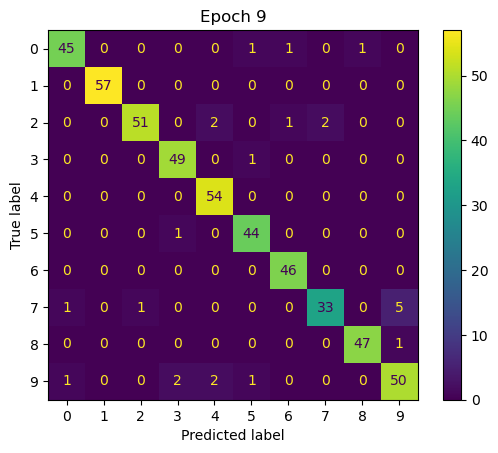

In [28]:
full_no_prune_results.set_trained_model(9)
full_no_prune_results.plot_confusion_matrix(test_dataloader)

## Random

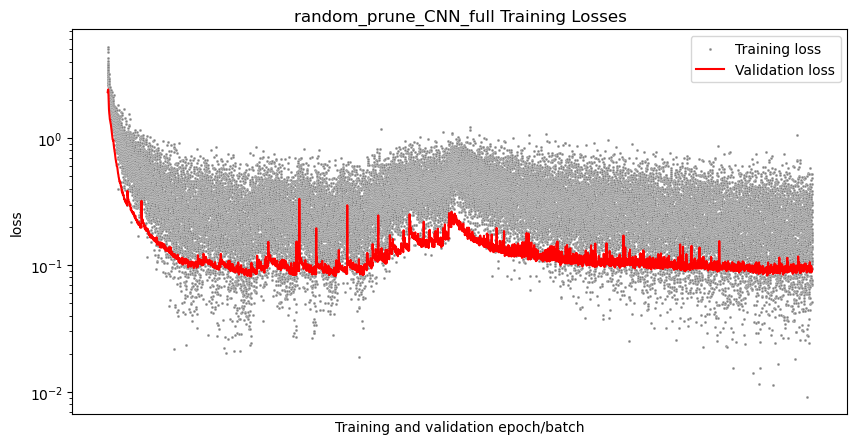

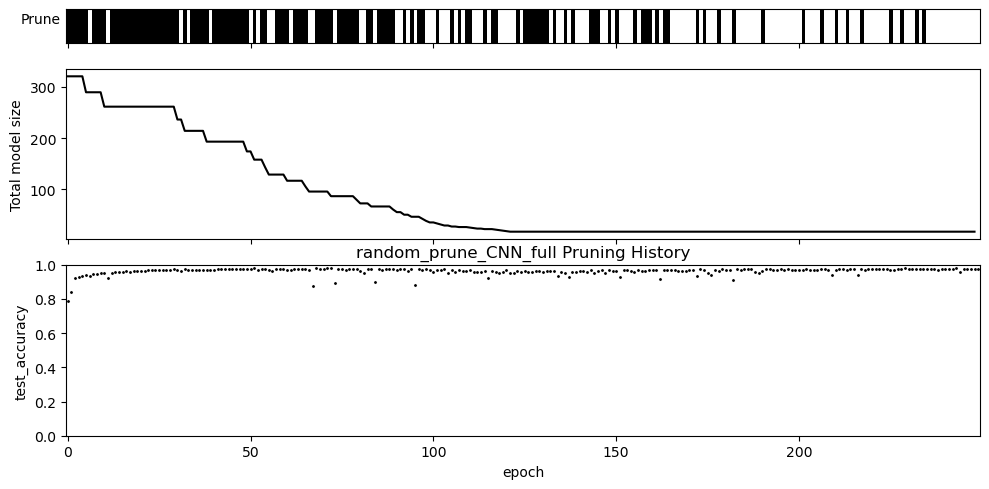

In [29]:
fig, ax = full_random_prune_results.plot_training_losses()
fig, ax = full_random_prune_results.plot_pruning()

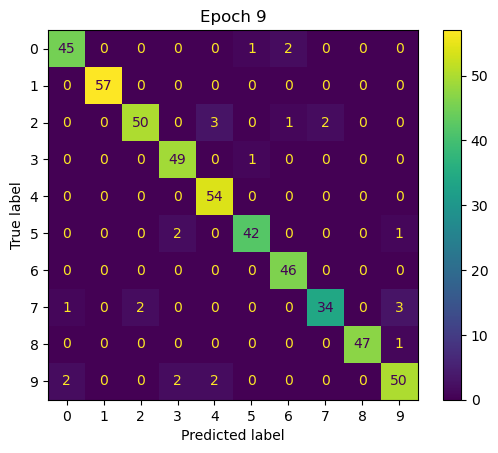

In [30]:
full_random_prune_results.set_trained_model(9)
full_random_prune_results.plot_confusion_matrix(test_dataloader)

## Activity

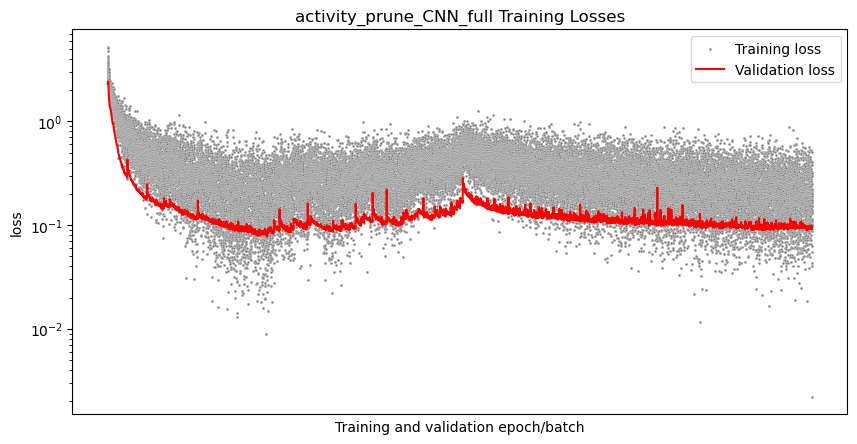

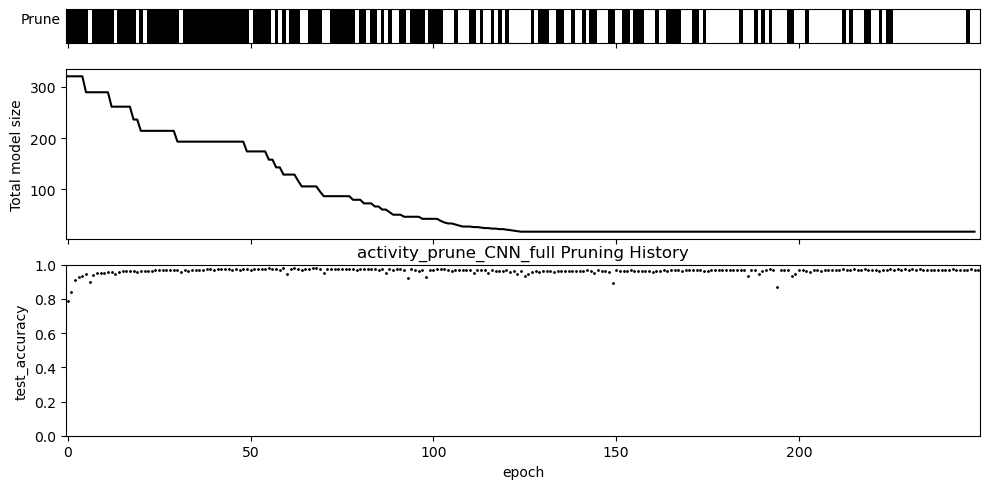

In [17]:
fig, ax = full_activity_prune_results.plot_training_losses()
fig, ax = full_activity_prune_results.plot_pruning()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Model size', ylabel='Test Accuracy'>)

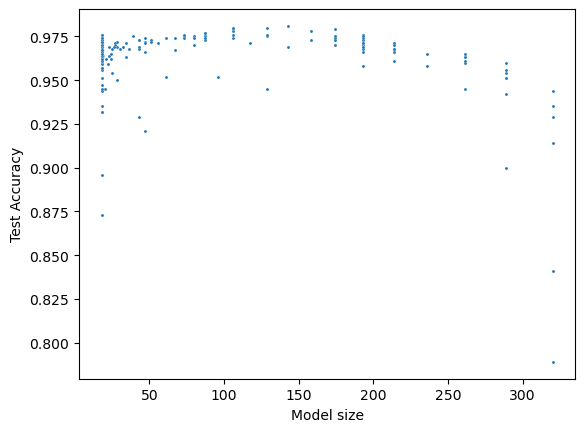

In [19]:
full_activity_prune_results.plot_model_size_vs_performance()

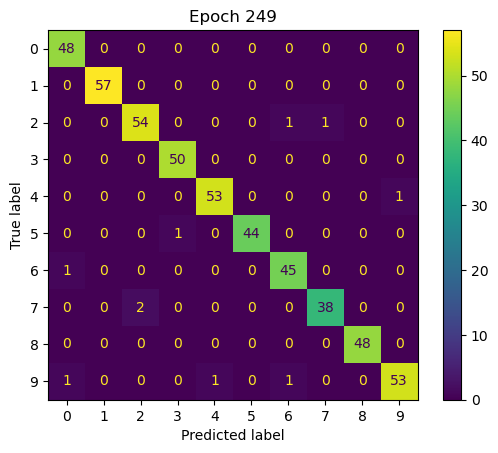

In [20]:
full_activity_prune_results.set_trained_model(249)
full_activity_prune_results.plot_confusion_matrix(test_dataloader)

# Quick Run - CIFAR10

```bash
$ sbatch sbatch_scripts/13_random-prune_CNN_fast_CIFAR10.sh 
Submitted batch job 57033586
$ sbatch sbatch_scripts/13_activity-prune_CNN_fast_CIFAR10.sh 
Submitted batch job 57033587
$ sbatch sbatch_scripts/13_no-prune_CNN_fast_CIFAR10.sh 
Submitted batch job 57033694
```

## No prune

In [11]:
cifar10_no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_no_prune_CNN_fast/sbatch-57033694_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-10_np-5_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

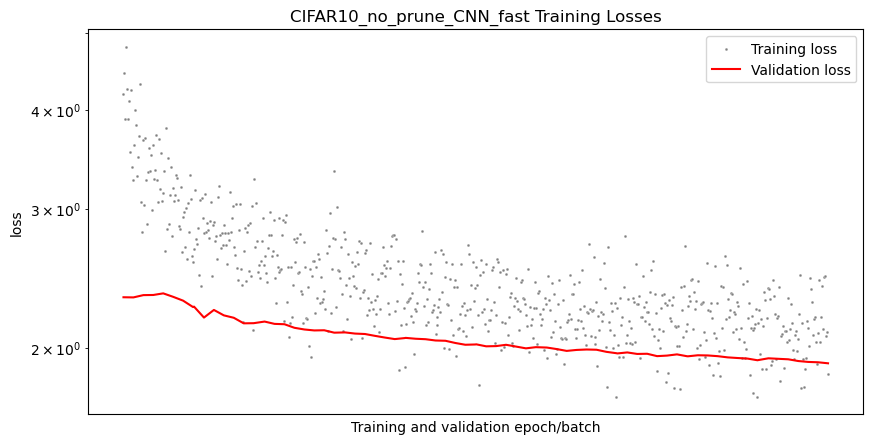

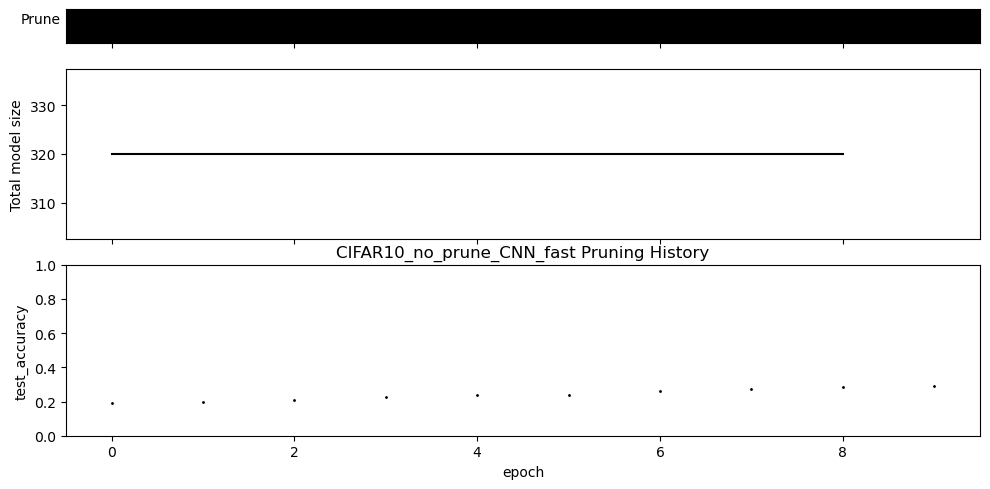

In [12]:
cifar10_no_prune_results.plot_training_losses()
cifar10_no_prune_results.plot_pruning()

## Random

In [9]:
full_cifar10_random_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_random_prune_CNN_fast/sbatch-57033586_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-10_np-5_lmd-10_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_random_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

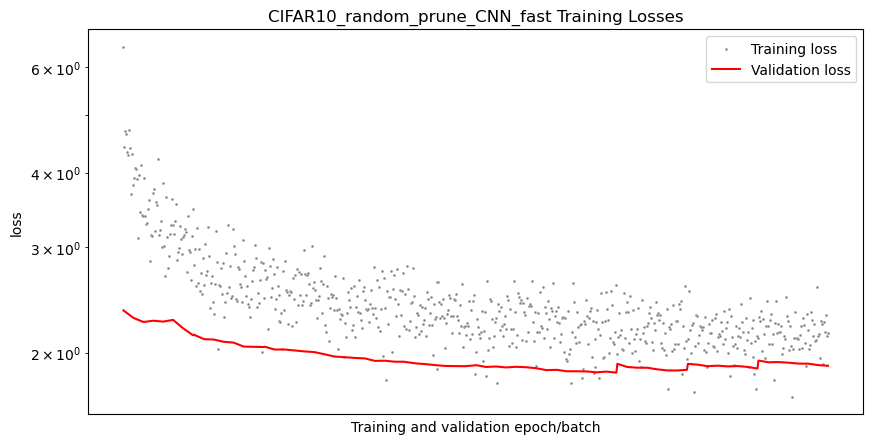

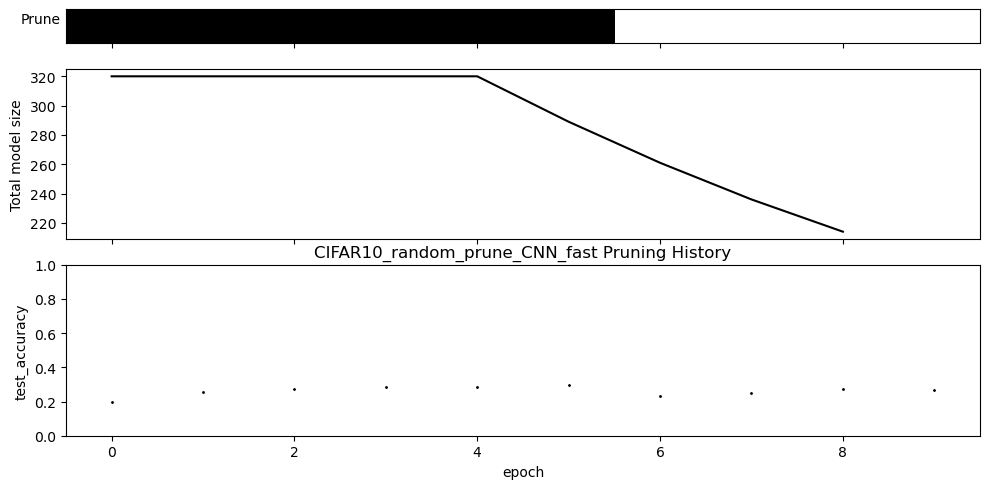

In [10]:
full_cifar10_random_prune_results.plot_training_losses()
full_cifar10_random_prune_results.plot_pruning()

## activity

In [21]:
cifar10_activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_activity_prune_CNN_fast/sbatch-57033587_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-10_np-5_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_activity_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

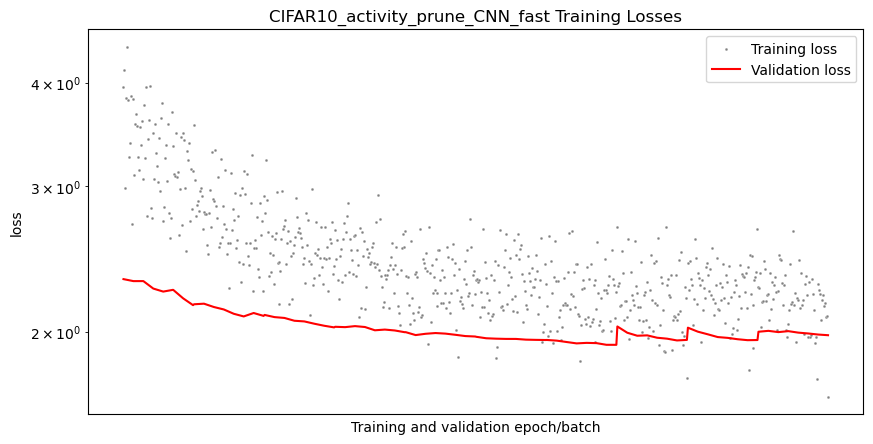

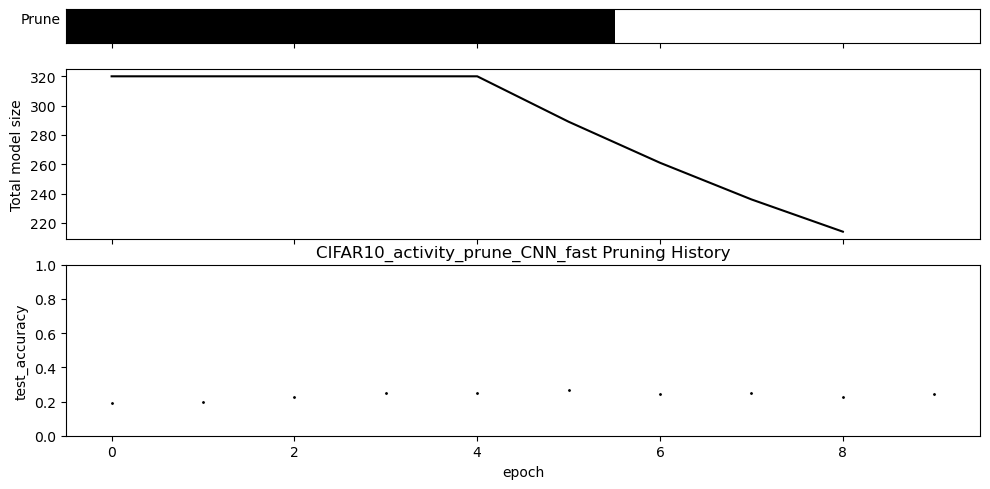

In [22]:
cifar10_activity_prune_results.plot_training_losses()
cifar10_activity_prune_results.plot_pruning()

# Full run - CIFAR10

```bash
$ sbatch sbatch_scripts/13_no-prune_CNN_full_CIFAR10.sh 
Submitted batch job 57035266
$ sbatch sbatch_scripts/13_activity-prune_CNN_full_CIFAR10.sh 
Submitted batch job 57035272
$ sbatch sbatch_scripts/13_random-prune_CNN_full_CIFAR10.sh 
Submitted batch job 57035273
```

## No Pruning

In [13]:
full_cifar10_no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_no_prune_CNN_full/sbatch-57035266_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-100_np-75_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_no_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

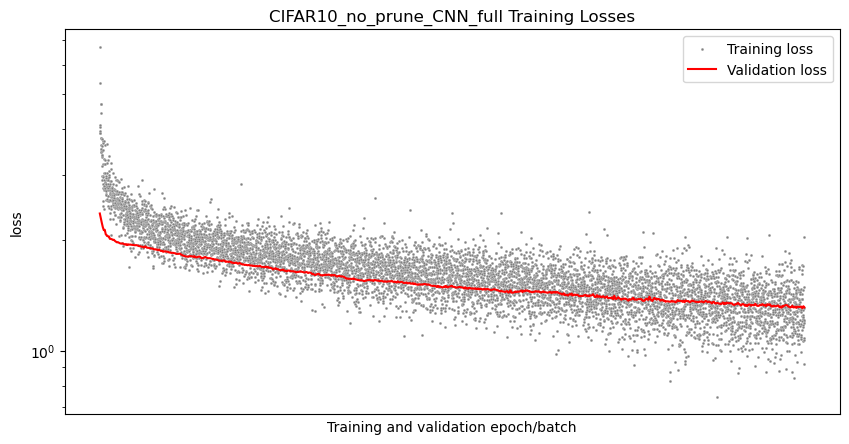

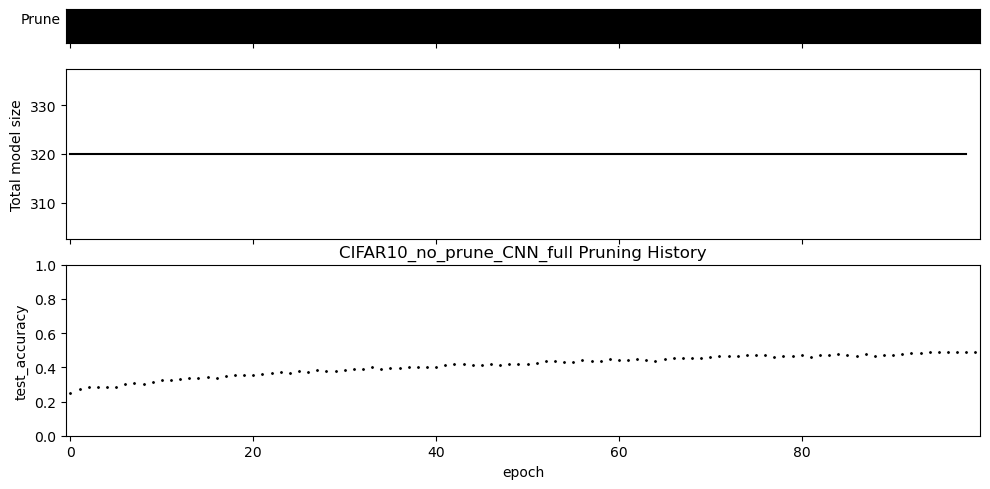

In [14]:
full_cifar10_no_prune_results.plot_training_losses()
full_cifar10_no_prune_results.plot_pruning()

## Random

In [25]:
full_cifar10_random_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_random_prune_CNN_full/sbatch-57035273_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-100_np-75_lmd-10_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_random_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

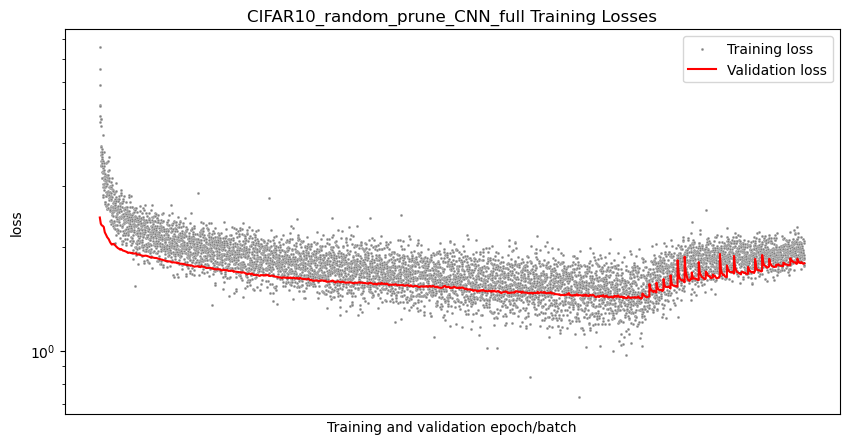

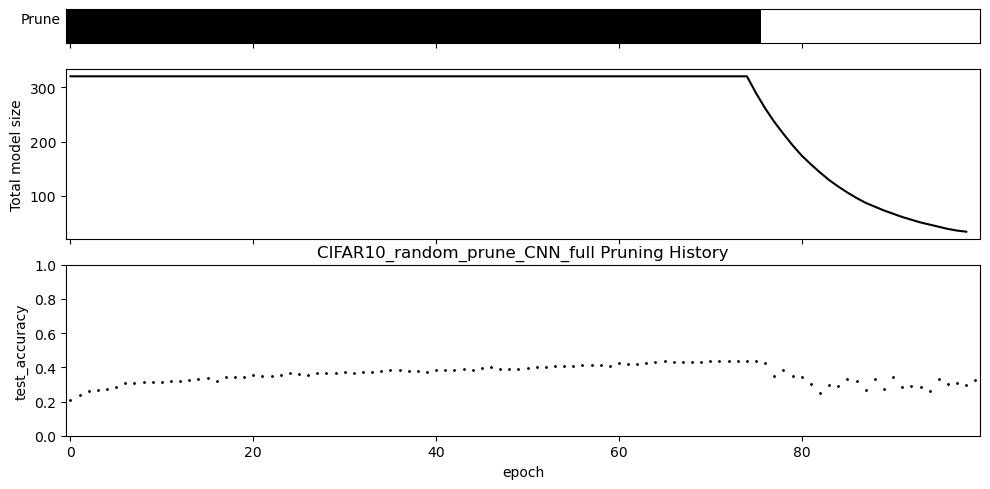

In [26]:
full_cifar10_random_prune_results.plot_training_losses()
full_cifar10_random_prune_results.plot_pruning()

## Activity

In [23]:
full_cifar10_activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/CIFAR10_activity_prune_CNN_full/sbatch-57035272_ds-CIFAR10_ic-3_bs-32_sf-0.05_vr-6_nti-100_np-75_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'CIFAR10_activity_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

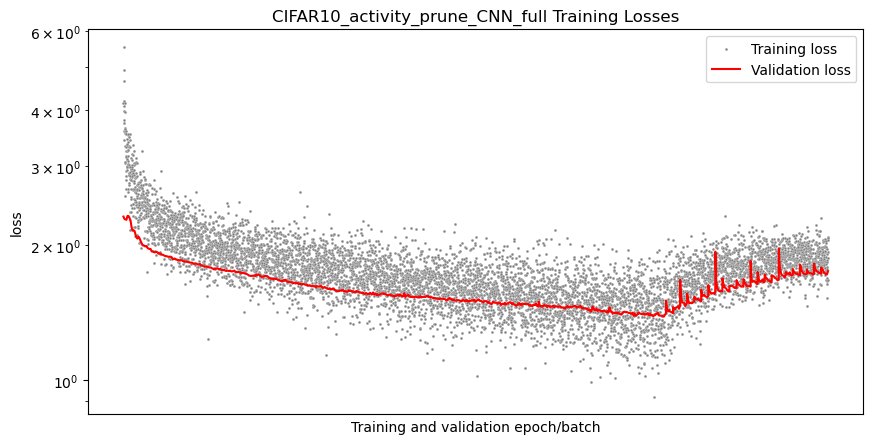

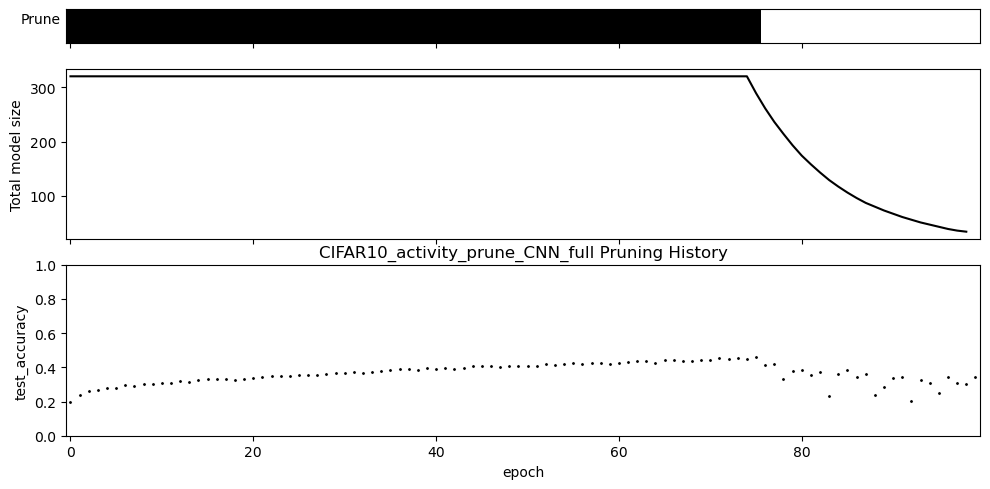

In [24]:
full_cifar10_activity_prune_results.plot_training_losses()
full_cifar10_activity_prune_results.plot_pruning()